# Median Filter
Median filter noise reduction

In [1]:
# Import header
from numpy import *
from scipy import misc
from matplotlib.pylab import *

# use matplotlib to display image
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams.update({'font.size': 10})

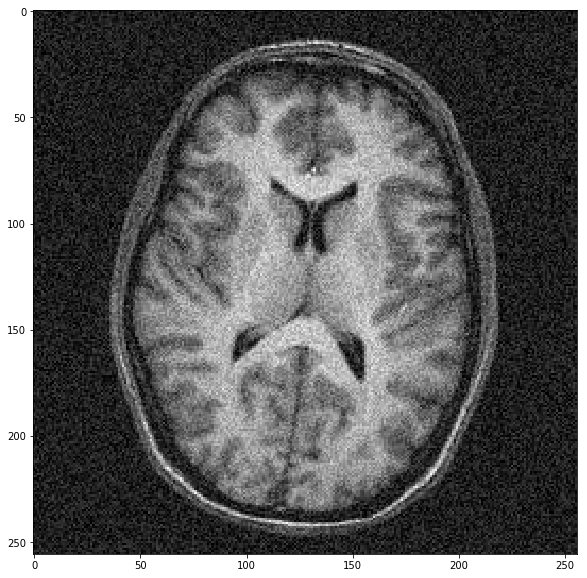

In [2]:
# read image
image = misc.imread('noisybrain.jpg')
#show before processing image
imshow(image, cmap = cm.gray)

In [3]:
# find mean of current pixel in picture
def pixel_median(image, x, y, length):
    [x_bound, y_bound] = image.shape
    width = (length - 1) // 2
    left_bound = x - width if x - width >= 0 else 0 
    right_bound = x + width + 1 if x + width + 1 <= x_bound else x_bound 
    bottom_bound = y - width if y - width >= 0 else 0
    top_bound = y + width + 1 if y + width + 1 <= y_bound else y_bound
    value = asarray([])
    count = (right_bound - left_bound) * (top_bound - bottom_bound)
    for i in range(left_bound,right_bound):
        for j in range(bottom_bound,top_bound):
            value = append(value,image[i,j])
    return median(value)

In [4]:
# Mean filter implementation
def median_filter(image,length):
    if length % 2 == 0:
        raise Exception('support odd number only!')
    if length < 3:
        raise Excpetion('please use length more than 3')
    new_image = copy(image)
    [x_bound, y_bound] = image.shape
    for x in range(x_bound):
        for y in range(y_bound):
            new_image[x][y] = pixel_median(image,x,y,length)
    return new_image

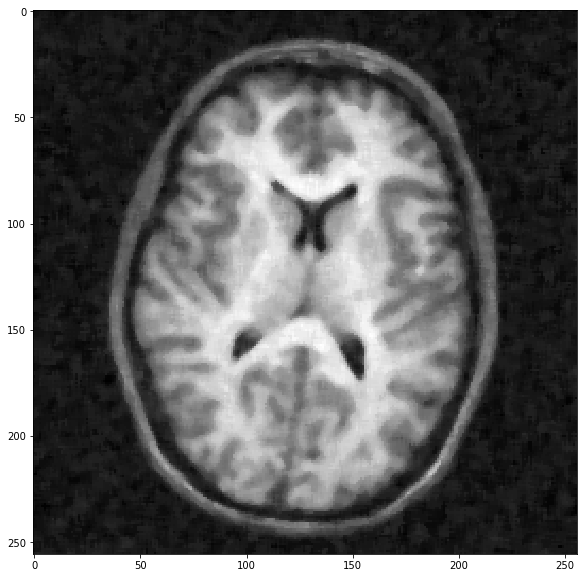

In [5]:
new_image = median_filter(image,5)
imshow(new_image,cmap = cm.gray)